# Model training

## 1.1 Import data and required packages

### Importing pandas, numpy, matplotlib, seaborn and warnings libraries

In [17]:
# basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### Import csv dataset as pandas dataframe

In [9]:
df = pd.read_csv('data/StudentsPerformance.csv')

Show top 5 records

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [12]:
X = df.drop(columns=['math score'], axis = 1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [13]:
y = df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [ ]:
# Create column transformer with 3 types of transformers

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [("OneHotEncoder", oh_transformer, cat_features),
     ("StandardScaler", numeric_transformer, num_features)
     ]
)

In [15]:
X = preprocessor.fit_transform(X)

In [16]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [18]:
X.shape

(1000, 19)

In [19]:
# separate dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

Create a evaluate function to give all metrics after model training

In [20]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, predicted)
    r2_square = r2_score(true, predicted)
    return mse, rmse, mae, r2_square

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Support Vector Regressor": SVR(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "XGB Regressor": XGBRegressor()
}

model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train) #train model

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train, rmse_train, mae_train, r2_square_train = evaluate_model(y_train, y_train_pred)
    mse_test, rmse_test, mae_test, r2_square_test = evaluate_model(y_test, y_test_pred)

    model_list.append(list(models.keys())[i])

    print(f"{list(models.keys())[i]}: ")
    print("Model performance for training set")
    print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}, R2 Score: {r2_square_train}")
    
    print("Model performance for testing set")
    print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R2 Score: {r2_square_test}")
    r2_list.append(r2_square_test)
    print("---------------------------------------")

    print("="*35)
    print("\n")

Linear Regression: 
Model performance for training set
MSE: 28.334870380648585, RMSE: 5.323050852720513, MAE: 4.266711846071957, R2 Score: 0.8743172040139593
Model performance for testing set
MSE: 29.095169866715494, RMSE: 5.393993869732843, MAE: 4.214763142474852, R2 Score: 0.8804332983749564
---------------------------------------


Lasso: 
Model performance for training set
MSE: 43.47840400585578, RMSE: 6.593815587795565, MAE: 5.206302661246526, R2 Score: 0.8071462015863458
Model performance for testing set
MSE: 42.50641683841163, RMSE: 6.519694535667421, MAE: 5.157881810347763, R2 Score: 0.8253197323627852
---------------------------------------


Ridge: 
Model performance for training set
MSE: 28.337788233082456, RMSE: 5.323324922741656, MAE: 4.264987823725977, R2 Score: 0.8743042615212908
Model performance for testing set
MSE: 29.05627219234824, RMSE: 5.390387016935634, MAE: 4.211100688014259, R2 Score: 0.8805931485028741
---------------------------------------


KNeighbors Regre

Results

In [29]:
pd.DataFrame({'Model': model_list, 'R2 Score': r2_list}).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest,0.853070
8,CatBoost Regressor,0.851632
6,AdaBoost Regressor,0.846035
9,XGB Regressor,0.827797
1,Lasso,0.825320
3,KNeighbors Regressor,0.783681
4,Decision Tree,0.735471
7,Support Vector Regressor,0.728600


Linear Regression

In [31]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_test_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_test_pred)
print("Accuracy of Linear Regression model is:", score)

Accuracy of Linear Regression model is: 0.8804332983749564


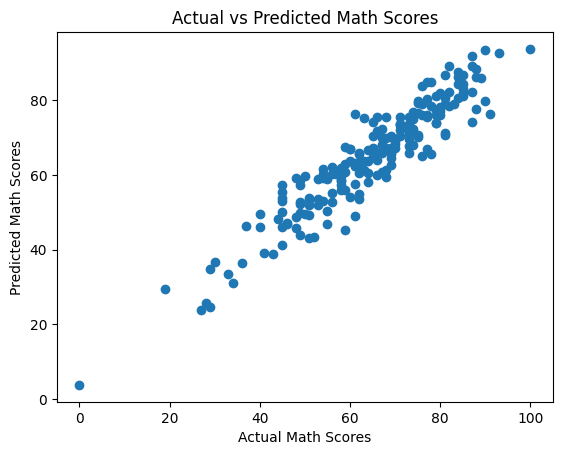

In [32]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.show()

<Axes: xlabel='math score'>

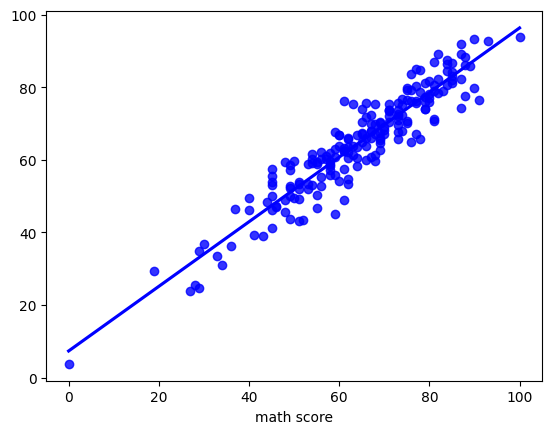

In [35]:
sns.regplot(x=y_test, y=y_test_pred, ci=None, color ='blue')

Difference between actual and predicted values

In [37]:
pred_df = pd.DataFrame({'Actual Math Scores': y_test, 'Predicted Math Scores': y_test_pred, "Difference": y_test - y_test_pred})
pred_df

,Actual Math Scores,Predicted Math Scores,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
